In [1]:
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt


In [21]:
from scipy.interpolate import RectBivariateSpline

def pad3(array, new_shape):
    x = np.linspace(0, array.shape[0] - 1, array.shape[0])
    y = np.linspace(0, array.shape[1] - 1, array.shape[1])
    interp = RectBivariateSpline(x, y, array)
    x1 = np.linspace(0, array.shape[0] - 1, new_shape[0])
    y1 = np.linspace(0, array.shape[1], new_shape[1])
    return interp(x1, y1)

def preproc(in_chanells=1):
    seispath = DATA_DIR + f'\\image_trans{in_chanells}'
    maskpath = DATA_DIR + f'\\mask_trans{in_chanells}'
    if os.path.exists(seispath)==False:
        os.mkdir(seispath)
    if os.path.exists(maskpath)==False:
        os.mkdir(maskpath)       
        
    data_path = DATA_DIR + '\\seismo_records_9shots'
    
    seis=np.empty([in_chanells,224,320])
    n = len(os.listdir(data_path + '\\masks'))
            
    for i in range(n):
        mask = np.load(data_path + f'\\masks\\{i}.npy')[1:]
        mask = pad3(mask,(224,320))
        mask = np.expand_dims(mask,axis=0)
        for j in range(0, in_chanells):
            image = np.load(data_path + f'\\seismograms\\{i}_position_{j+1}0.npy')[20:]
            image = pad3(image,(224,320))
            image = (image - np.min(image)) / (np.max(image) - np.min(image))
            seis[j] = np.copy(image)
        np.save(DATA_DIR + f'\\image_trans{in_chanells}\\{i}_position_10.npy', seis)
        np.save(DATA_DIR + f'\\mask_trans{in_chanells}\\{i}.npy', mask)
    
    
preproc(1)

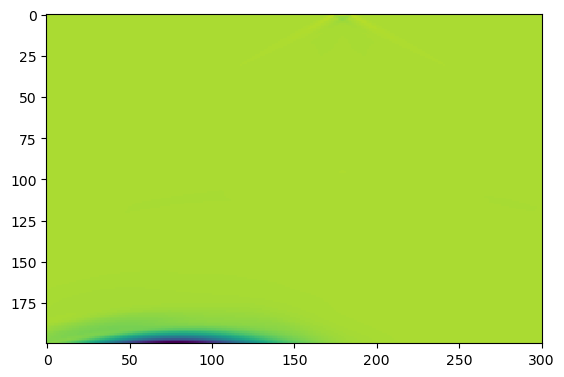

In [2]:
in_chanells=1


DATA_DIR = 'C:\\Users\\123\\Downloads\\seismo_records_9shots.tar'
x_train_dir = DATA_DIR + '\\train_image_trans'
y_train_dir = DATA_DIR + '\\train_mask_trans'

x_test_dir = DATA_DIR + f'\\test_image_trans'
y_test_dir = DATA_DIR + f'\\test_mask_trans'
data1 = np.load(DATA_DIR + '\\seismo_records_9shots'+'\\seismograms\\236_position_60.npy')
plt.show()
data2=(data1-np.min(data1))/(np.max(data1)-np.min(data1))
plt.imshow(data1, interpolation='nearest')
plt.show()
seis_dir=DATA_DIR + '\\image_trans'
mask_dir=DATA_DIR + '\\mask_trans'


In [3]:
        
def visualize_data(dataset):
    
    fig, axes = plt.subplots(5, 2, figsize=(16,9))
    
    for i, axis in enumerate(axes):
        n = np.random.randint(len(dataset))
        image, mask = dataset[n]
        axis[0]
        axis[0].set_title(f'seis{n}')
        axis[0].imshow(image[0], interpolation='nearest')
        
        axis[1].set_title(f'mask{n}')
        axis[1].imshow(mask[0], interpolation='nearest')
    
    plt.show()  
    

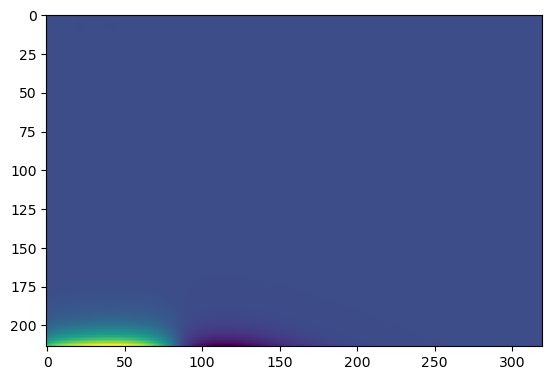

0.0
1.0


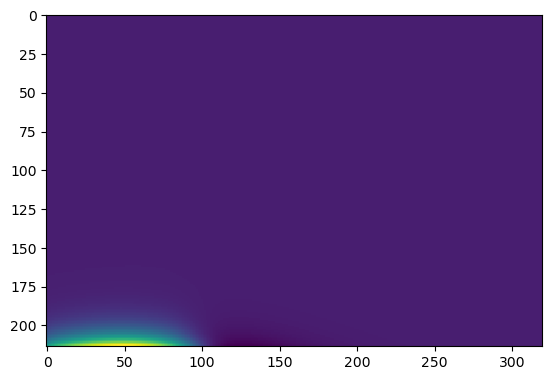

0.0
1.0


In [4]:
data = np.load('C:\\Users\\123\\Downloads\\seismo_records_9shots.tar\\image_trans2\\236_position_10.npy')
for i in range(2):
    plt.imshow(data[i][10:], interpolation='nearest')
    plt.show()
    print(np.min(data[i]))
    print(np.max(data[i]))

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset 
import torch


class MyDataset(Dataset):
    def __init__(self, image_dir, masks_dir,in_chanells=1, preprocessing=None):
        self.id = os.listdir(image_dir + f'{in_chanells}')
        self.images_fps = [image_dir + f'{in_chanells}' + f'\\{i}' for i in os.listdir(image_dir + f'{in_chanells}')]
        self.masks_fps = [masks_dir + f'{in_chanells}' + f'\\{i}' for i in os.listdir(masks_dir + f'{in_chanells}')]
        
    def __getitem__(self, index):
        image = np.load(self.images_fps[index])
        mask = np.load(self.masks_fps[index])
        image = torch.from_numpy(image.astype(np.float32))
        mask = torch.from_numpy(mask.astype(np.float32))
            
        return image, mask
        
    
    
    def __len__(self):
        return len(self.id) 

C:\Users\123\anaconda3\envs\dip\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


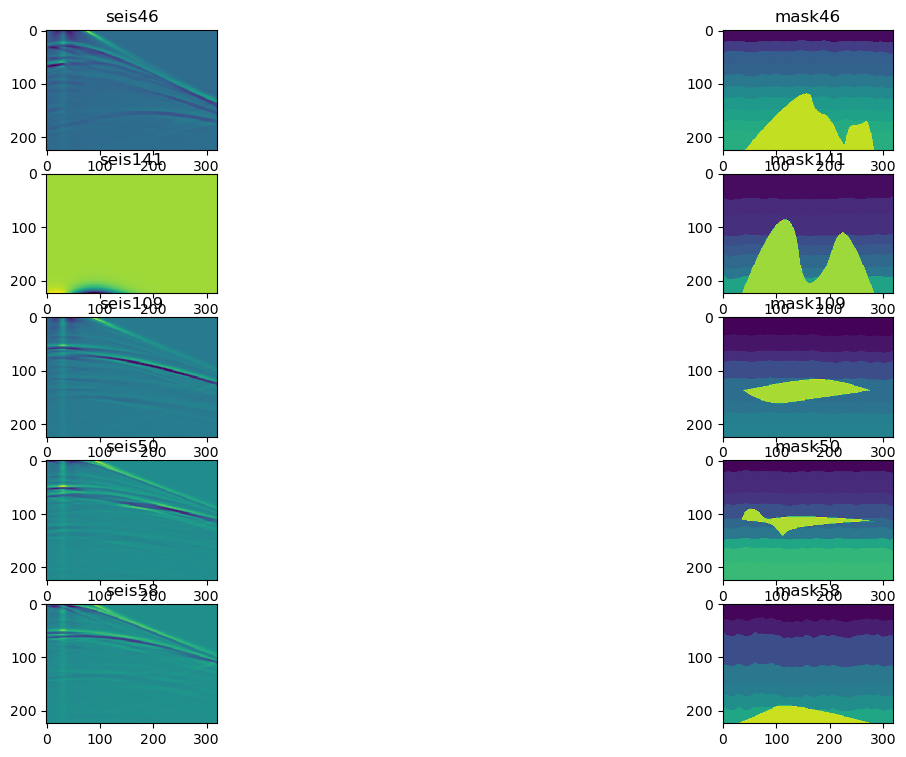

160
160
1280


In [5]:
''''
testloader = torch.utils.data.DataLoader(testset,
batch_size=10,
shuffle=False)
'''''

dataset = MyDataset(seis_dir, mask_dir, in_chanells=1)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
valid_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [int(0.5*len(test_dataset)), int(0.5*len(test_dataset))])

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

visualize_data(valid_dataset)

print(len(valid_dataset))
print(len(test_dataset))
print(len(train_dataset))

tensor([[0.7648, 0.7648, 0.7648,  ..., 0.7648, 0.7648, 0.7648],
        [0.7648, 0.7648, 0.7648,  ..., 0.7648, 0.7648, 0.7648],
        [0.7648, 0.7648, 0.7648,  ..., 0.7648, 0.7648, 0.7648],
        ...,
        [0.8220, 0.8237, 0.8287,  ..., 0.7648, 0.7648, 0.7648],
        [0.8307, 0.8327, 0.8384,  ..., 0.7648, 0.7648, 0.7648],
        [0.8406, 0.8430, 0.8495,  ..., 0.7648, 0.7648, 0.7648]])

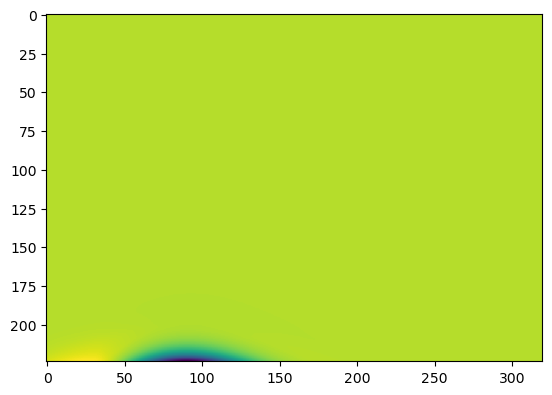

In [115]:
im,m=train_dataset[511]
plt.imshow(im[0])
im[1]

In [6]:
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils







C:\Users\123\anaconda3\envs\dip\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [8]:
from torch import nn
from skimage.metrics import structural_similarity as ssim
cuda_available = torch.cuda.is_available()
ACTIVATION = 'sigmoid' 
DEVICE = "cuda"
model = smp.Unet(in_channels=1, encoder_weights=None, decoder_use_batchnorm=True)

loss=0
loss = nn.MSELoss()
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.001),
])
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

loss.__name__ = 'MSELoss'


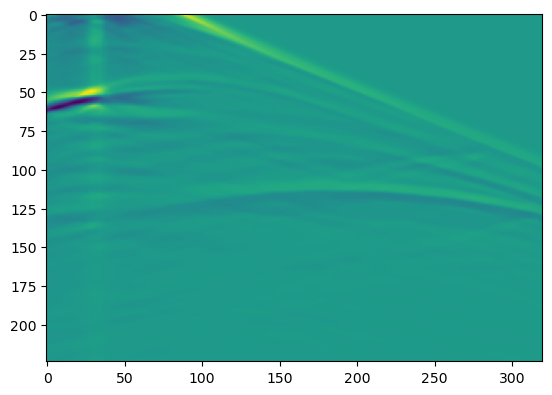

In [9]:



train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    verbose=True,
    device=DEVICE
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

im, m = train_dataset[4]
plt.imshow(im[0])

In [30]:
import gc
torch.cuda.empty_cache()
gc.collect()

54366

In [10]:
best_valid_loss = float("inf")
for i in range(0, 10):
    
    print('\nEpoch: {}'.format(i))
    train_epoch.run(train_loader)
    valid_loss = valid_epoch.run(valid_loader)
    
    if valid_loss['MSELoss'] < best_valid_loss:
        best_valid_loss= valid_loss['MSELoss']
        torch.save(model, './best_model.pth')
        print('Model saved!')
    
    


Epoch: 0
valid: 100%|███████████████████████████████████| 160/160 [00:19<00:00,  8.14it/s, MSELoss - 1.03e+07, iou_score - 5.23]
Model saved!

Epoch: 1
valid: 100%|█████████████████████████████████| 160/160 [00:21<00:00,  7.52it/s, MSELoss - 1.027e+07, iou_score - 1.437]
Model saved!

Epoch: 2
valid: 100%|█████████████████████████████████| 160/160 [00:19<00:00,  8.03it/s, MSELoss - 1.022e+07, iou_score - 1.564]
Model saved!

Epoch: 3
valid: 100%|█████████████████████████████████| 160/160 [00:20<00:00,  7.97it/s, MSELoss - 1.017e+07, iou_score - 1.699]
Model saved!

Epoch: 4
valid: 100%|█████████████████████████████████| 160/160 [00:21<00:00,  7.37it/s, MSELoss - 1.012e+07, iou_score - 1.785]
Model saved!

Epoch: 5
valid: 100%|█████████████████████████████████| 160/160 [00:18<00:00,  8.48it/s, MSELoss - 1.007e+07, iou_score - 1.783]
Model saved!

Epoch: 6
valid: 100%|█████████████████████████████████| 160/160 [00:22<00:00,  6.96it/s, MSELoss - 9.999e+06, iou_score - 1.783]
Model saved!

In [130]:
import gc
torch.cuda.empty_cache()
gc.collect()

227

In [11]:
model1 = torch.load('.\\best_model.pth')

test_dataloader = DataLoader(test_dataset)

In [9]:
test_epoch = smp.utils.train.ValidEpoch(
    model=model1,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
)

logs = test_epoch.run(test_dataloader)

valid: 100%|█████████████████████████████| 400/400 [00:48<00:00,  8.24it/s, MSELoss - 1.025e+07, iou_score - 3.111e+03]


In [13]:


def visualize_results(test_dataset):
    for i in range(5):
        n = np.random.randint(len(test_dataset))
        image, mask = test_dataset[n]
        plt.figure(figsize=(20,20))
        plt.subplot(i+1,2,1)
        plt.title(f'mask{i+1}')
        plt.imshow(mask[0], interpolation='nearest')
    
        plt.subplot(i+1,2,2)
        plt.title(f'prediction{i+1}')
        pred=model1.predict((image.to(DEVICE).unsqueeze(0)))
        plt.imshow(pred.cpu()[0][0], interpolation='nearest')
        plt.show()
    

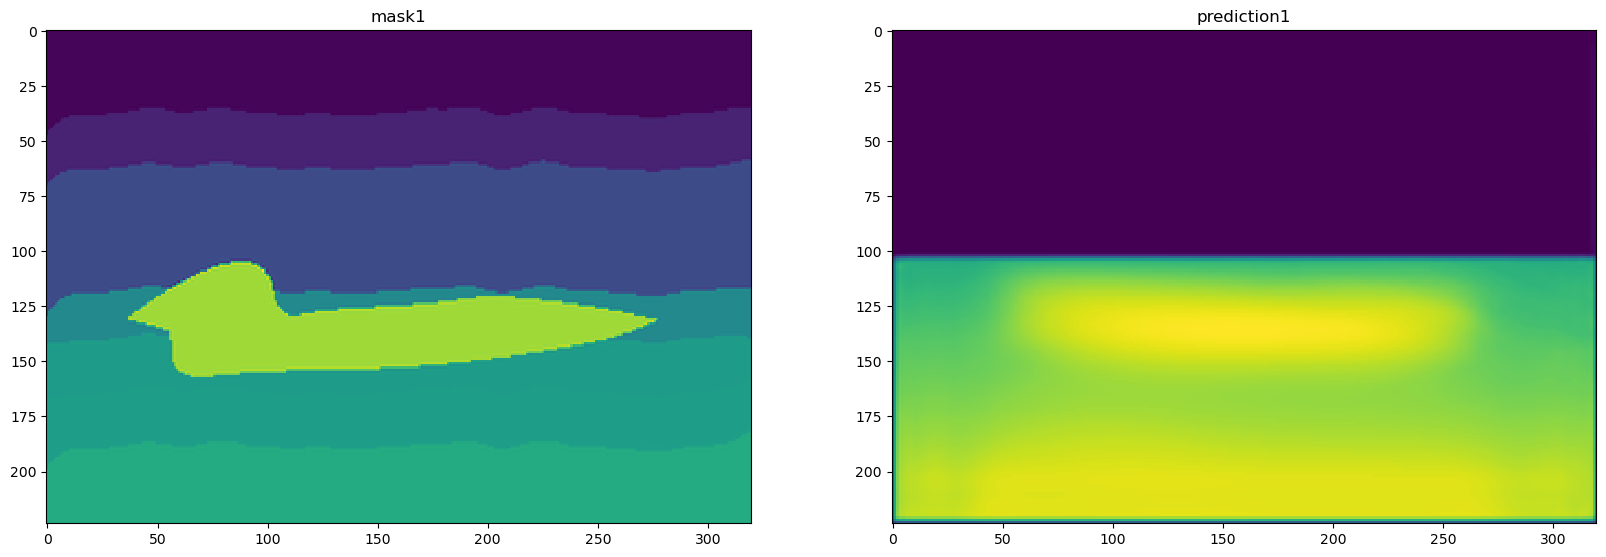

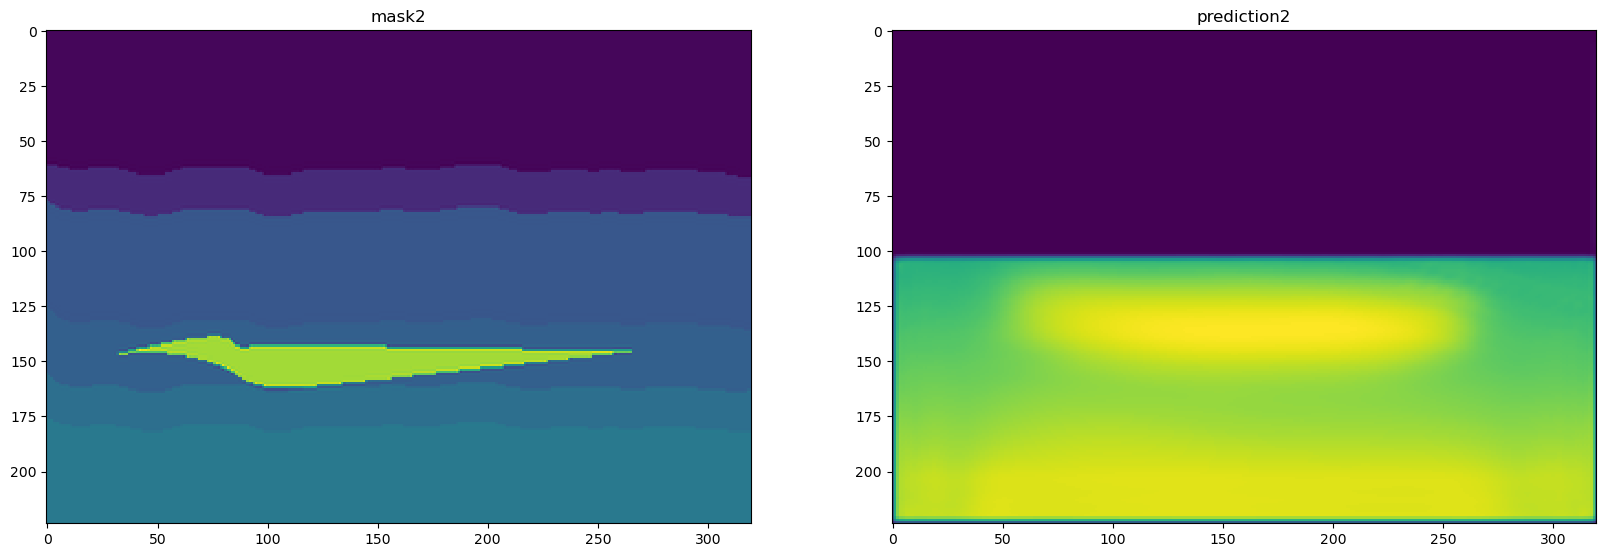

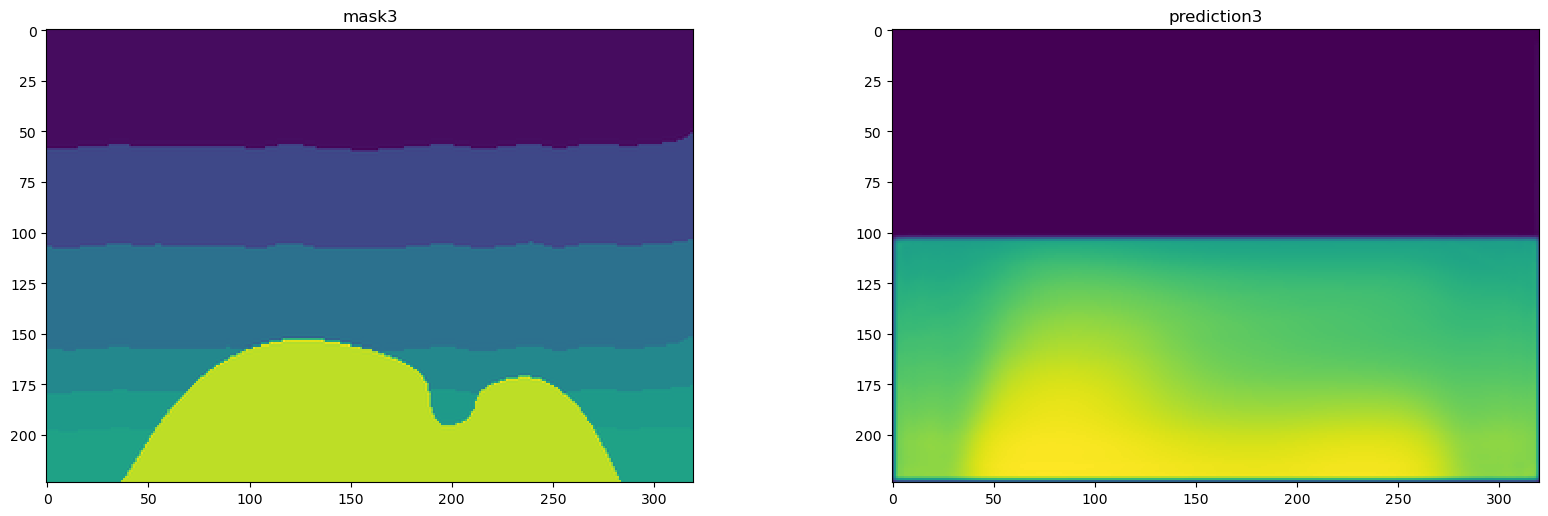

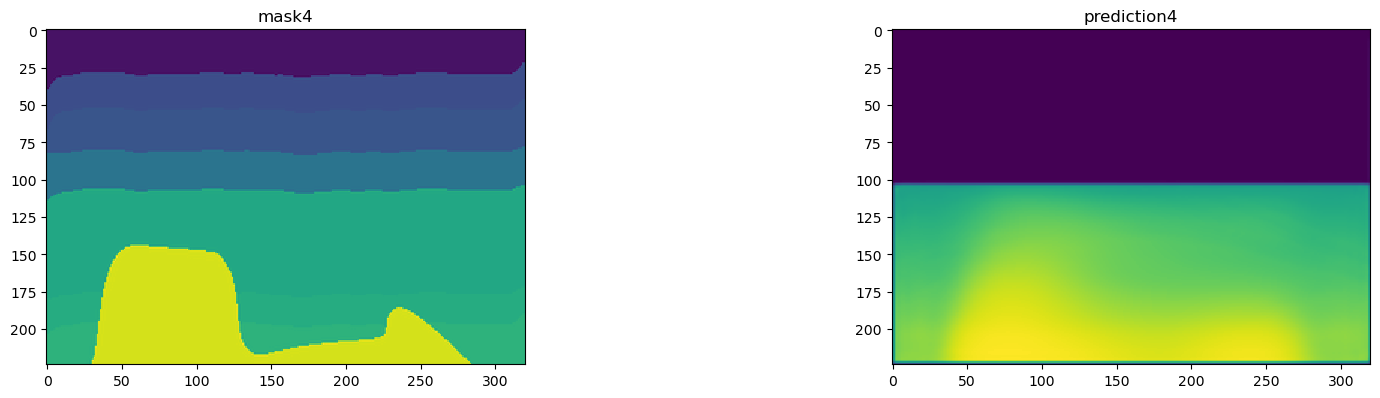

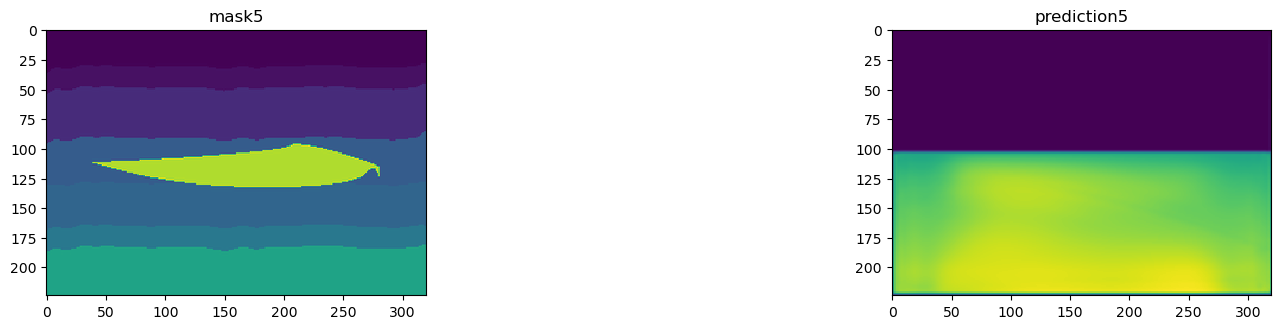

In [16]:
visualize_results(test_dataset)

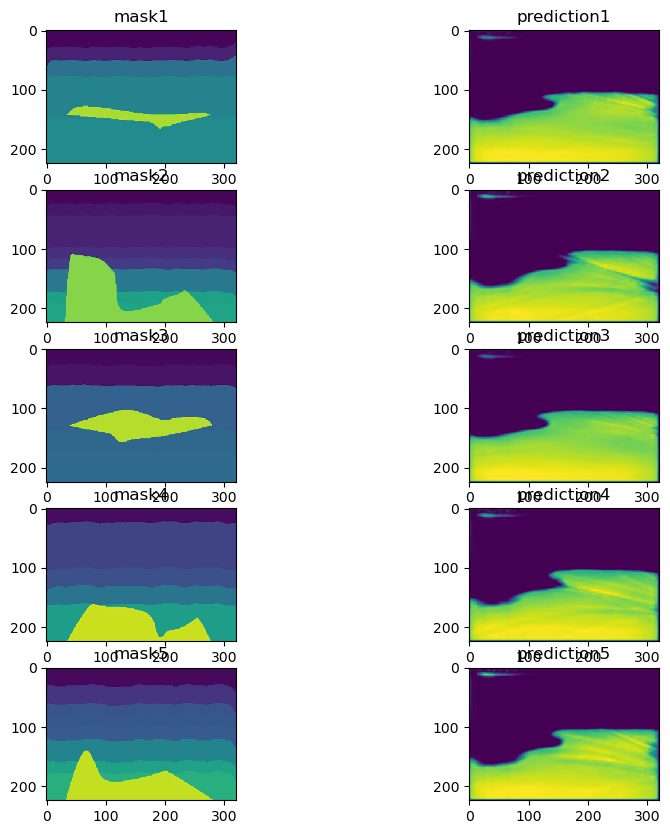

In [94]:
fig, axes = plt.subplots(5, 2, figsize=(10,10))
    
for i, axis in enumerate(axes):
    n = np.random.randint(400)
    image, mask = test_dataset[n]
    axis[0].set_title(f'mask{i+1}')
    axis[0].imshow(mask[0], interpolation='nearest')
        
    axis[1].set_title(f'prediction{i+1}')
    pred=model1.predict((image.to(DEVICE).unsqueeze(0)))
    axis[1].imshow(pred.cpu()[0][0], interpolation='nearest')
  
        